In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Reading the datasets
df = pd.read_csv("/Users/sivakarthick/Hub/Winequality6/winequality-red.csv", delimiter=";")

In [6]:
print(df.info())
print('\n')
print(df.describe())  
print('\n')
print(df.isnull().sum())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000

In [7]:
def categorize_quality(q):
    if q <= 5:
        return "Low"
    elif q == 6:
        return "Medium"
    else:
        return "High"

df["quality_label"] = df["quality"].apply(categorize_quality)

In [8]:
# categorical labels into numerical values
label_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["quality_label"] = df["quality_label"].map(label_mapping)

In [9]:
#Fixing Features (X) and Target (y)
X = df.drop(columns=["quality", "quality_label"])  
y = df["quality_label"]

In [10]:
# Training (80%) & Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26, stratify=y)

In [11]:
# Normalize features 
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [12]:
# Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=26)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=26)

In [13]:
# Predict on Test Data
y_pred = model.predict(X_test)


In [14]:
# Evaluating Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6875

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       149
           1       0.65      0.60      0.63       128
           2       0.57      0.72      0.64        43

    accuracy                           0.69       320
   macro avg       0.66      0.69      0.67       320
weighted avg       0.69      0.69      0.69       320



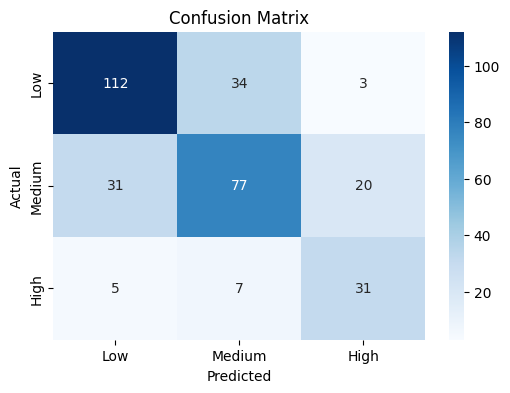

In [15]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

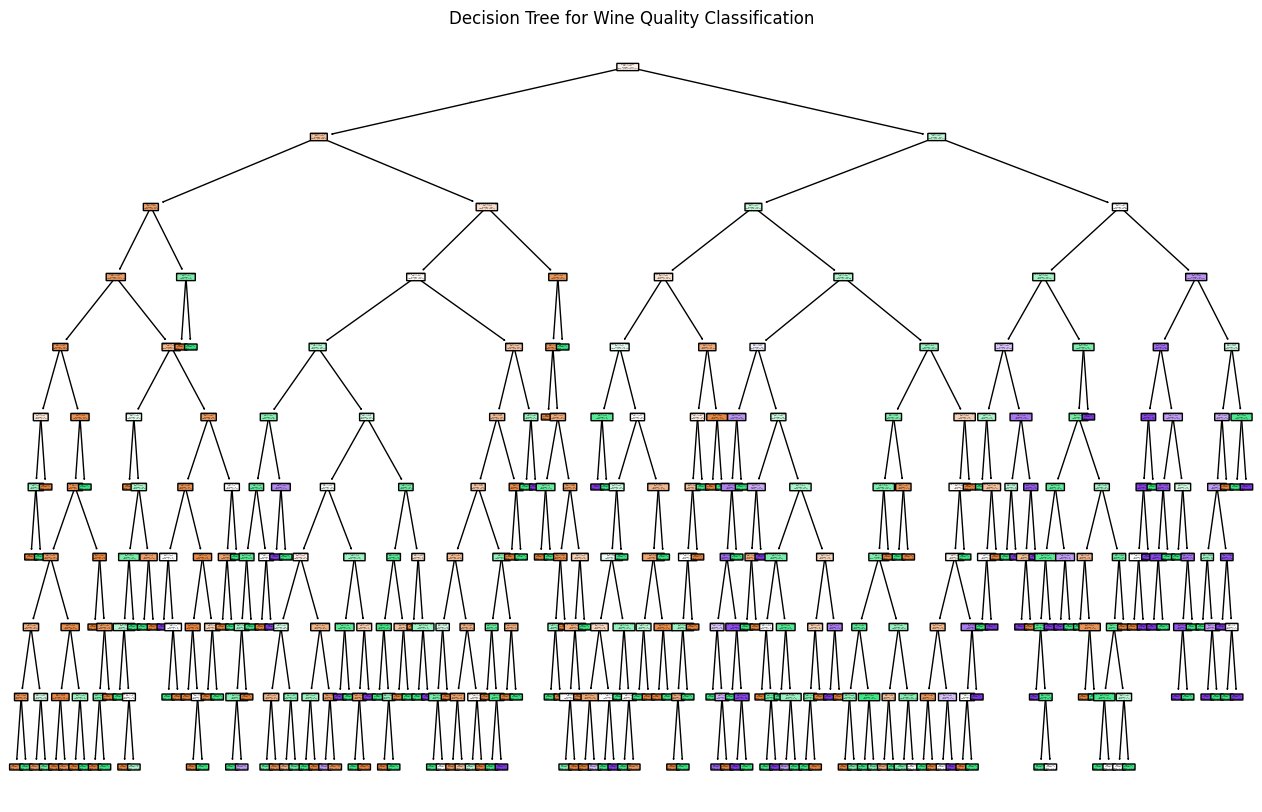

In [16]:
# Visualize Decision Tree
plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=["Low", "Medium", "High"], filled=True, rounded=True)
plt.title("Decision Tree for Wine Quality Classification")
plt.show()

In [30]:
def predict_static_wine_quality(wine_sample, scaler, feature_names):
    wine_sample_df = pd.DataFrame(wine_sample, columns=feature_names)
    
    wine_sample_scaled = scaler.transform(wine_sample_df)
    
    predicted_label = model.predict(wine_sample_scaled)[0]
    
    quality_mapping = {0: "Low", 1: "Medium", 2: "High"}
    
    print("\nPredicted Wine Quality:", quality_mapping[predicted_label])

static_samples = [
    [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],  
    [6.5, 0.30, 0.40, 2.8, 0.065, 18.0, 50.0, 0.9952, 3.75, 0.80, 12.5], 
    [7.9, 0.55, 0.10, 2.2, 0.075, 14.0, 30.0, 0.9965, 3.40, 0.65, 10.5] 
]

f = X.columns.tolist()
for i in static_samples:
    predict_static_wine_quality([i], s, f)



Predicted Wine Quality: Low

Predicted Wine Quality: High

Predicted Wine Quality: Medium
